In [1]:

import math

import matplotlib.pyplot as plt
import numpy as np
from li2021_odeint import lightsim_20min_5min, params
from mxlpy import Simulator, make_protocol
from mxlpy_version import get_li2021
from matplotlib.lines import Line2D

import mxlbricks.names as n
import pandas as pd

In [2]:
res_li = {}

res_li = lightsim_20min_5min(par=500, params=params)

res_li.keys()

dict_keys(['QAm', 'PQH2', 'pH_lumen', 'Dy', 'K_lumen', 'PC_ox', 'P700_ox', 'Zx', 'singletO2', 'Fd_red', 'NADPH', 'Cl_lumen', 'Cl_stroma', 'time_sec', 'time_min', 'time_h', 'PsbS_H', 'NPQ', 'QA', 'Phi2', 'PQ', 'P700_red', 'PC_red', 'Fd_ox', 'NADP', 'H_lumen', 'H_stroma', 'Vx', 'pmf', 'light_per_L', 'driving_force_Cl', 'k_CBC', 'delta_pH', 'delta_pH_V', 'v_PSII_recombination', 'v_PSII_charge_separations', 'v_PQ_reduction_QA', 'v_PQH2_oxidation_QA', 'v_b6f', 'v_NDH', 'v_PGR', 'v_PSI_charge_separation', 'v_PC_oxidation_P700', 'v_LEF', 'v_Mehler', 'v_CBB_NADPH', 'v_KEA', 'v_K_channel', 'v_VCCN1', 'v_CLCE', 'v_leak', 'v_pmf_protons_activity', 'v_ZE', 'v_VDE'])

# Compare li2021_new ith mxlpy

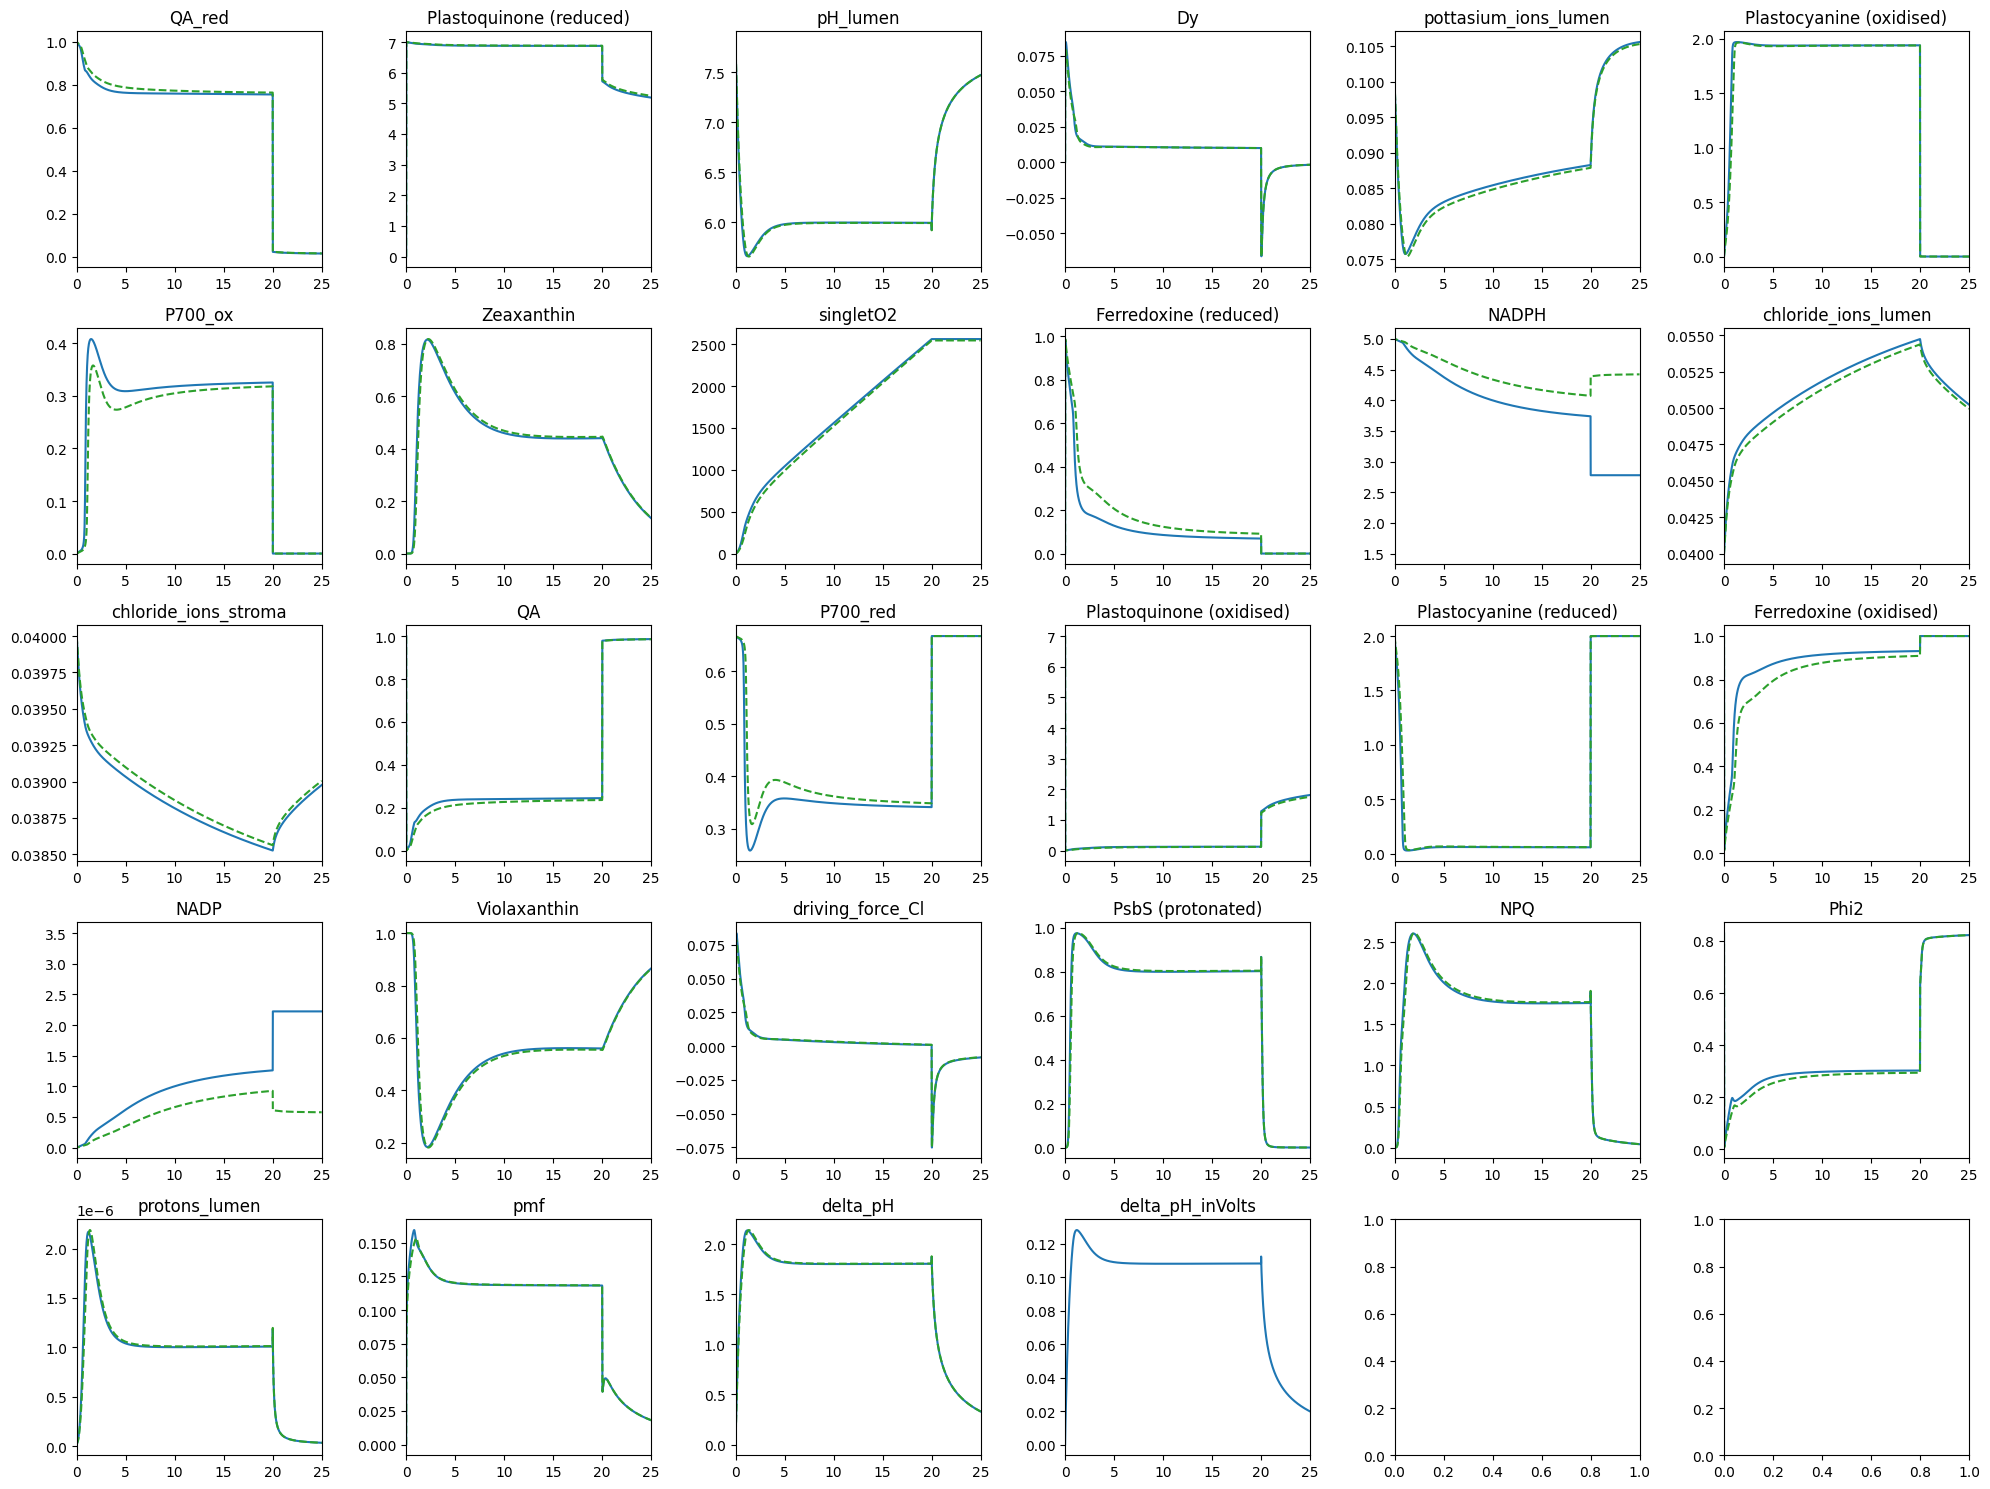

In [3]:
from mxlpy import Scipy

m = get_li2021()

light_100 = make_protocol([(20 * 60, {"PAR": 500}), (5 * 60, {"PAR": 0})])

s = Simulator(m, integrator=Scipy)
s.simulate_protocol(light_100, time_points_per_step=1000)
res, flux = s.get_result()

fig3, axs = plt.subplots(ncols=math.ceil(np.sqrt(len(res.columns))), nrows=math.floor(np.sqrt(len(res.columns))), figsize=(20, 15))

old = ["QAm", "PQH2", "K_lumen", "PC_ox", "Zx", "Fd_red", "Cl_lumen", "Cl_stroma", "PQ", "PC_red", "Fd_ox", "H_lumen", "H_stroma", "Vx", "PsbS_H"]
new = ["QA_red", n.pq_red(), n.pottassium("_lumen"), n.pc_ox(), n.zx(), n.fd_red(), n.chloride("_lumen"), n.chloride("_stroma"), n.pq_ox(), n.pc_red(), n.fd_ox(), n.h("_lumen"), n.h("_stroma"), n.vx(), n.psbs_pr()]

for o, ne in zip(old, new):
    if o in res_li.keys():
        res_li[ne] = res_li.pop(o)

for ax, var in zip(axs.flatten(), res.columns):
    ax.plot(res.index / 60, res[var])
    ax.set_title(var)
    ax.set_xlim(0, 25)
    
    if var in res_li.keys():
        ax.plot(res_li["time_min"], res_li[var], ls="dashed", color="tab:green")
    
    
plt.tight_layout()
plt.show()

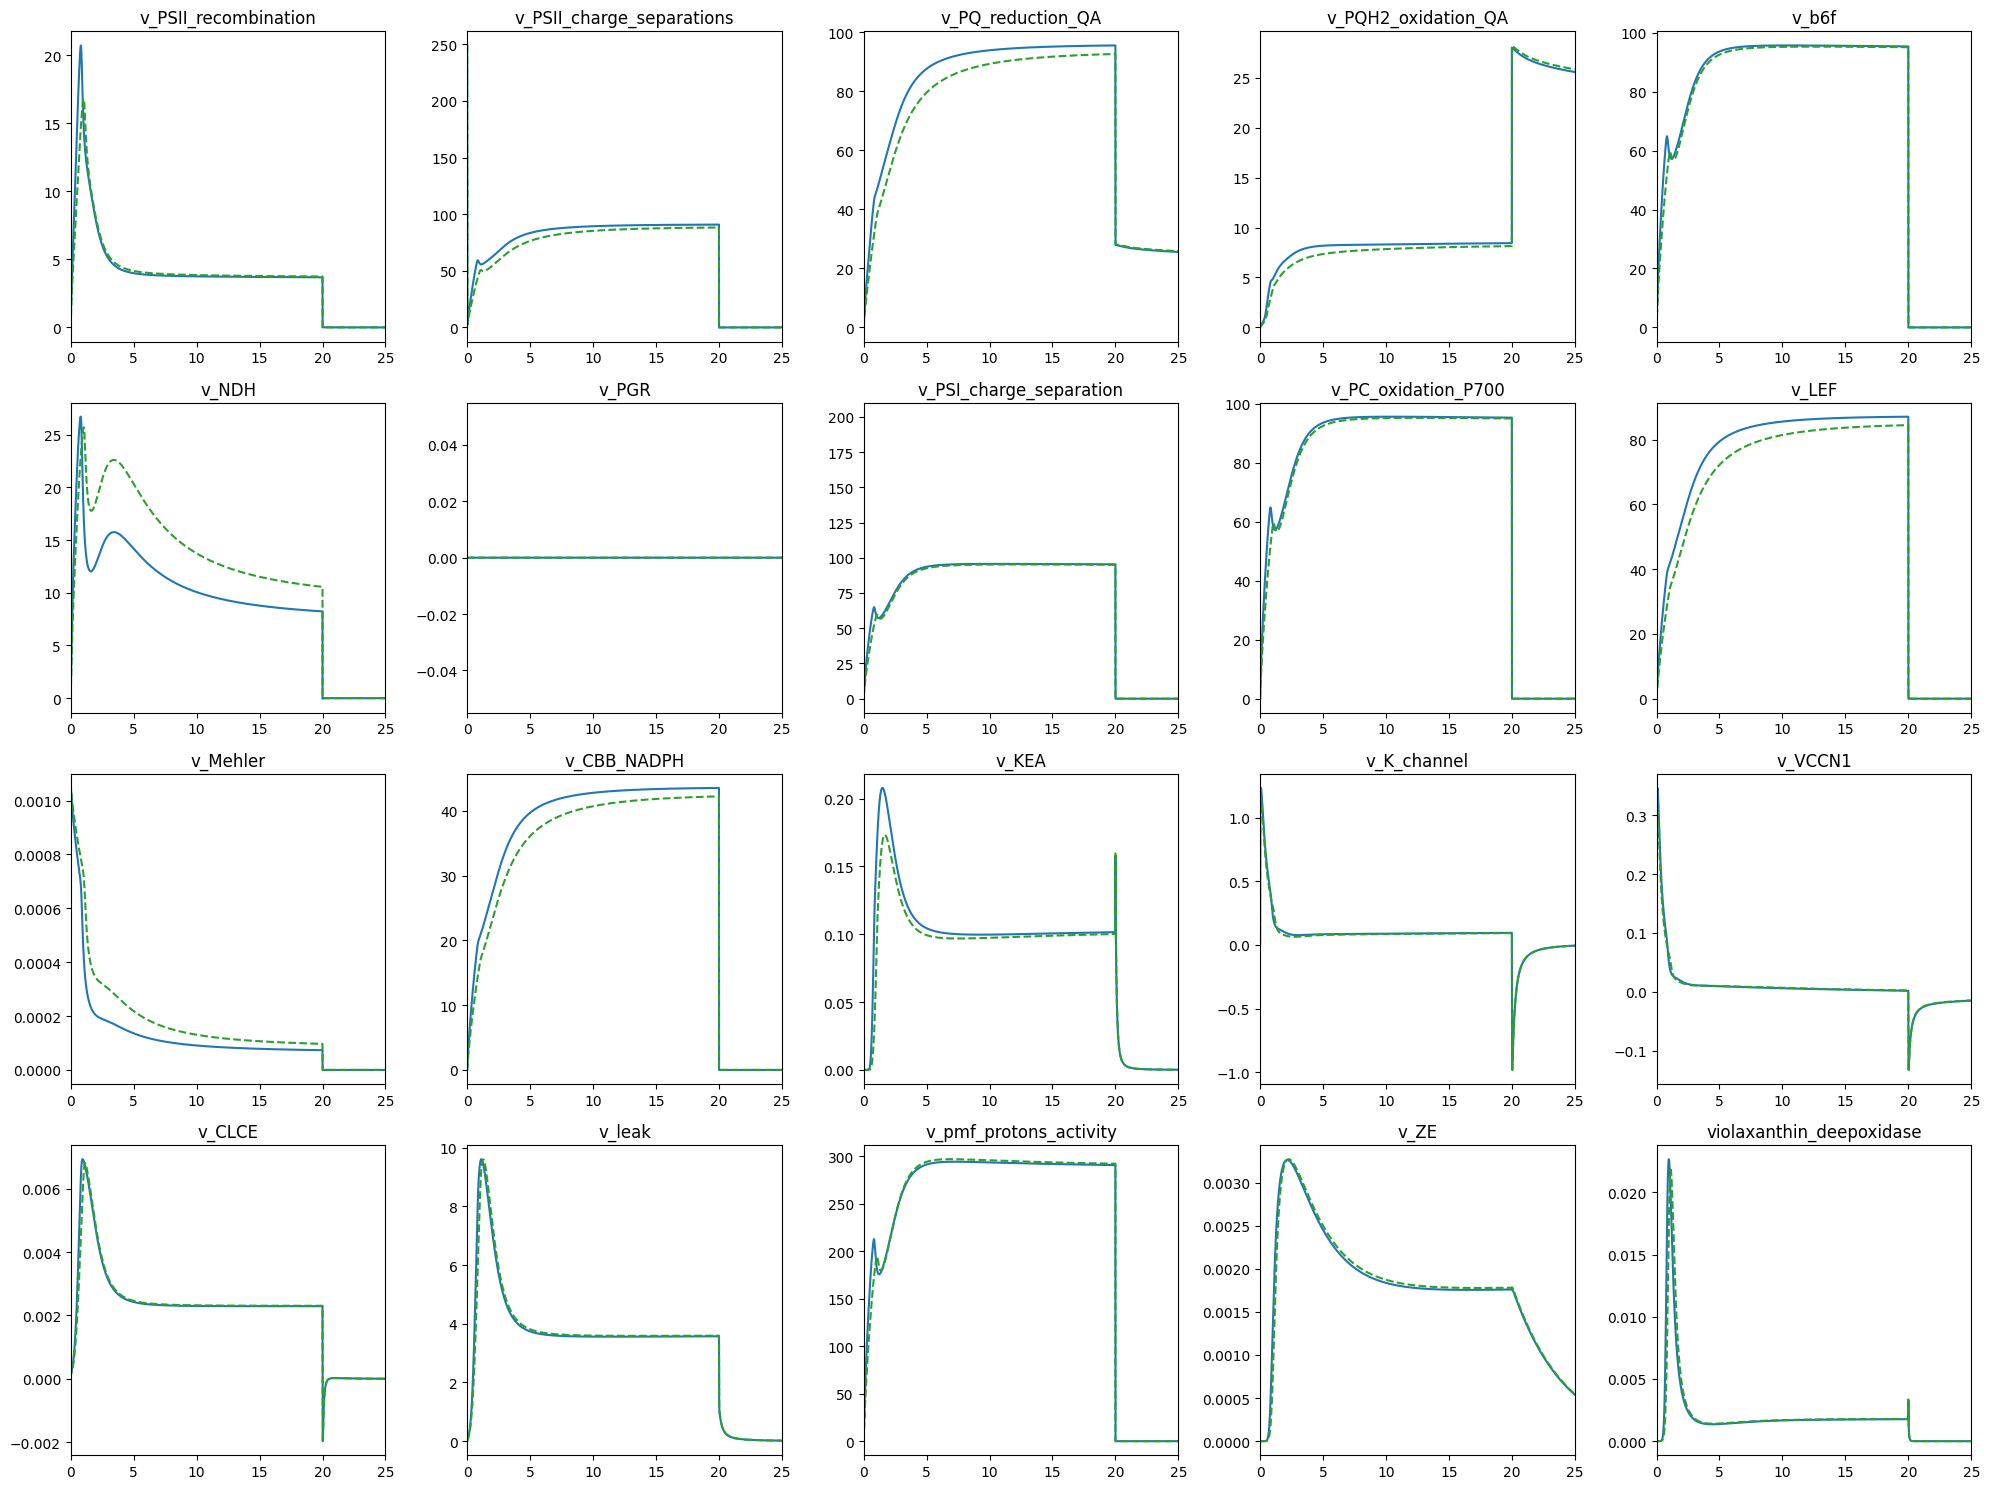

In [4]:
m = get_li2021()

light_100 = make_protocol([(20 * 60, {"PAR": 500}), (5 * 60, {"PAR": 0})])

s = Simulator(m)
s.simulate_protocol(light_100, time_points_per_step=1000)
res, flux = s.get_result()

fig3, axs = plt.subplots(ncols=math.ceil(np.sqrt(len(flux.columns))), nrows=math.floor(np.sqrt(len(flux.columns))), figsize=(20, 15))

old = ["v_VDE"]
new = [n.violaxanthin_deepoxidase()]

for o, ne in zip(old, new):
    if o in res_li.keys():
        res_li[ne] = res_li.pop(o)

for ax, var in zip(axs.flatten(), flux.columns):
    ax.plot(flux.index / 60, flux[var])
    ax.set_title(var)
    ax.set_xlim(0, 25)
    
    if var in res_li.keys():
        ax.plot(res_li["time_min"], res_li[var], ls="dashed", color="tab:green")
    
    
plt.tight_layout()
plt.show()

# Compare li2021_old with mxlpy

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'], ['k_CBC', 60, 40.0]]

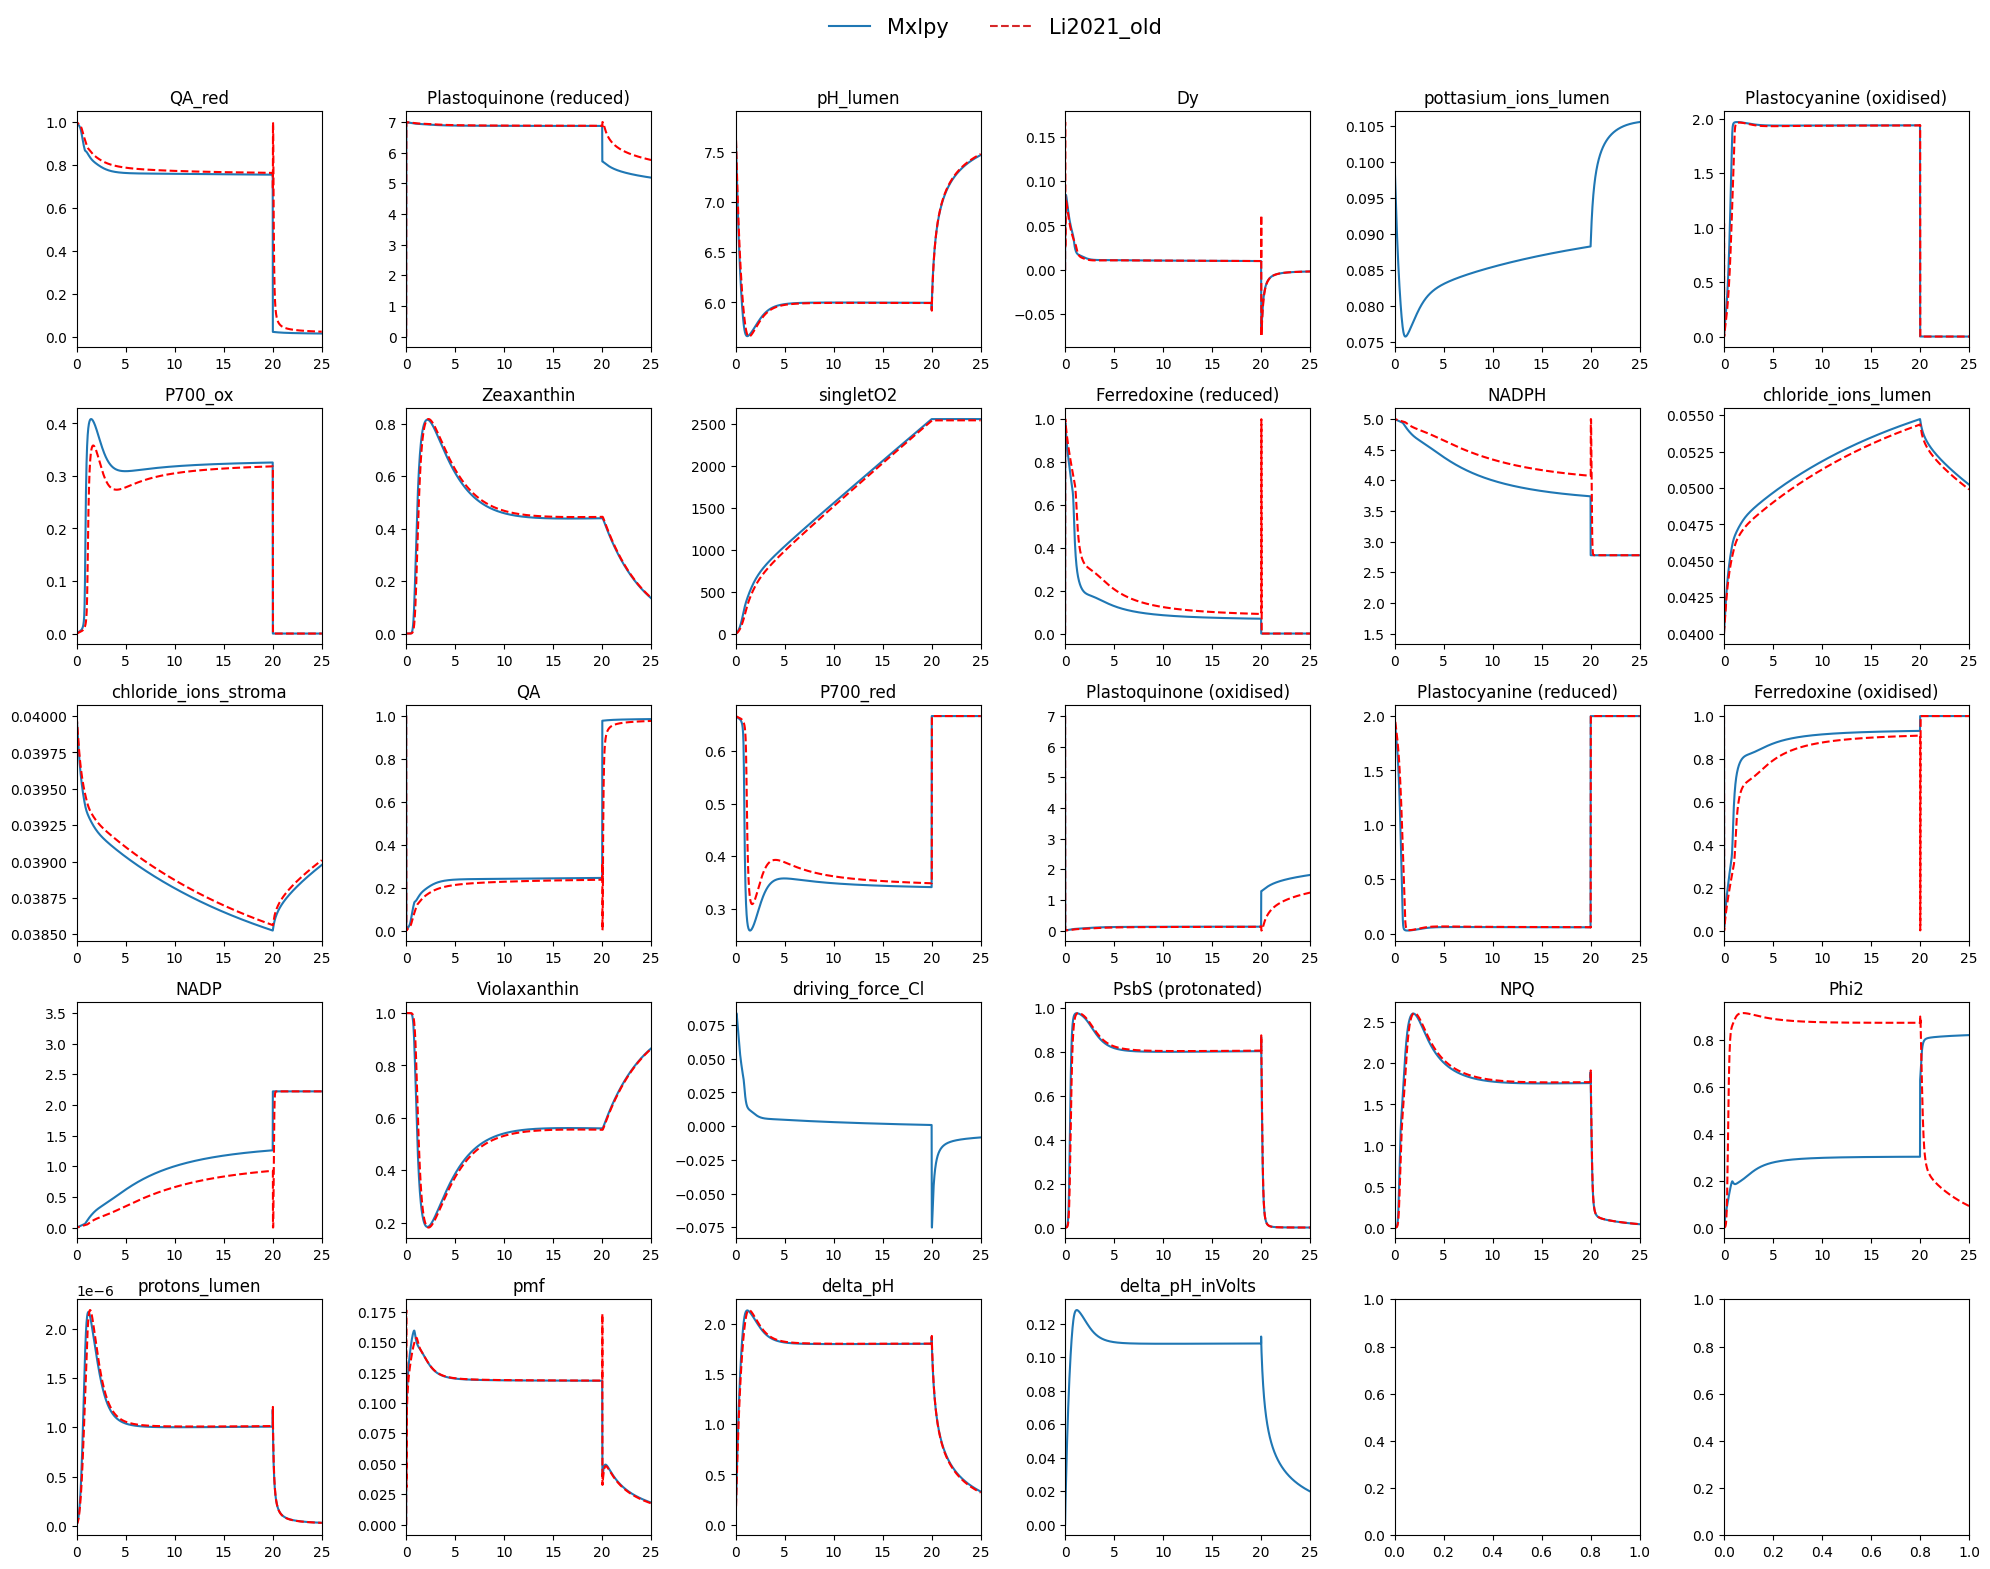

In [5]:
from deltapsi_leaf_old import sim_a_gtype

res_old = sim_a_gtype({}, "WT", 500)

m = get_li2021()

light_100 = make_protocol([(20 * 60, {"PAR": 500}), (5 * 60, {"PAR": 0})])

s = Simulator(m)
s.simulate_protocol(light_100, time_points_per_step=1000)
res, flux = s.get_result()

fig, axs = plt.subplots(ncols=math.ceil(np.sqrt(len(res.columns))), nrows=math.floor(np.sqrt(len(res.columns))), figsize=(20, 15))

old = ["QAm", "PQH2", "K_lumen", "PC_ox", "Zx", "Fd_red", "Cl_lumen", "Cl_stroma", "PQ", "PC_red", "Fd_ox", "H_lumen", "H_stroma", "Vx", "PsbS_H"]
new = ["QA_red", n.pq_red(), n.pottassium("_lumen"), n.pc_ox(), n.zx(), n.fd_red(), n.chloride("_lumen"), n.chloride("_stroma"), n.pq_ox(), n.pc_red(), n.fd_ox(), n.h("_lumen"), n.h("_stroma"), n.vx(), n.psbs_pr()]

for o, ne in zip(old, new):
    if o in res_old.keys():
        res_old[ne] = res_old.pop(o)

for ax, var in zip(axs.flatten(), res.columns):
    ax.plot(res.index / 60, res[var])
    ax.set_title(var)
    ax.set_xlim(0, 25)
    
    if var in res_old.keys():
        ax.plot(res_old["time_axis_min"], res_old[var], ls="dashed", color="red")
    

fig.legend(
    [
        Line2D([0], [0], color="tab:blue", ls="solid"),
        Line2D([0], [0], color="tab:red", ls="dashed")
    ],
    ["Mxlpy", "Li2021_old"],
    ncols=2,
    frameon=False,
    loc="upper center",
    prop={"size": 15},
    bbox_to_anchor=(0.5, 1.05)
)

fig.tight_layout()
plt.show()

# Compare li2021_oldmodel_newsim with li2021_old

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'], ['k_CBC', 60, 40.0]]

FloatProgress(value=0.0, max=101.0)

v_lef=np.float64(0.0), t=0.0
v_lef=np.float64(2.81286542369692), t=4.016370991214278e-06
v_lef=np.float64(2.688590044680149), t=4.016370991214278e-06
v_lef=np.float64(0.5690251471164578), t=8.124868238972767e-07
v_lef=np.float64(0.5639395059177513), t=8.124868238972767e-07
v_lef=np.float64(1.1279697308824235), t=1.6249736477945535e-06
v_lef=np.float64(1.1229286861310057), t=1.6249736477945535e-06
v_lef=np.float64(2.230958581377106), t=3.249947295589107e-06
v_lef=np.float64(2.2310475221643933), t=3.249947295589107e-06
v_lef=np.float64(3.319310471990534), t=4.87492094338366e-06
v_lef=np.float64(3.31948789862133), t=4.87492094338366e-06
v_lef=np.float64(4.388467499719051), t=6.499894591178214e-06
v_lef=np.float64(4.388641402133842), t=6.499894591178214e-06
v_lef=np.float64(11.804029028274446), t=1.8655294312339467e-05
v_lef=np.float64(11.80640746664317), t=1.8655294312339467e-05
v_lef=np.float64(18.3064822191311), t=3.081069403350072e-05
v_lef=np.float64(18.295247051486935), t=3.081069403

[['Changed Parameter', 'Old Value', 'New Value'], ['k_CBC', 60, 40.0]]

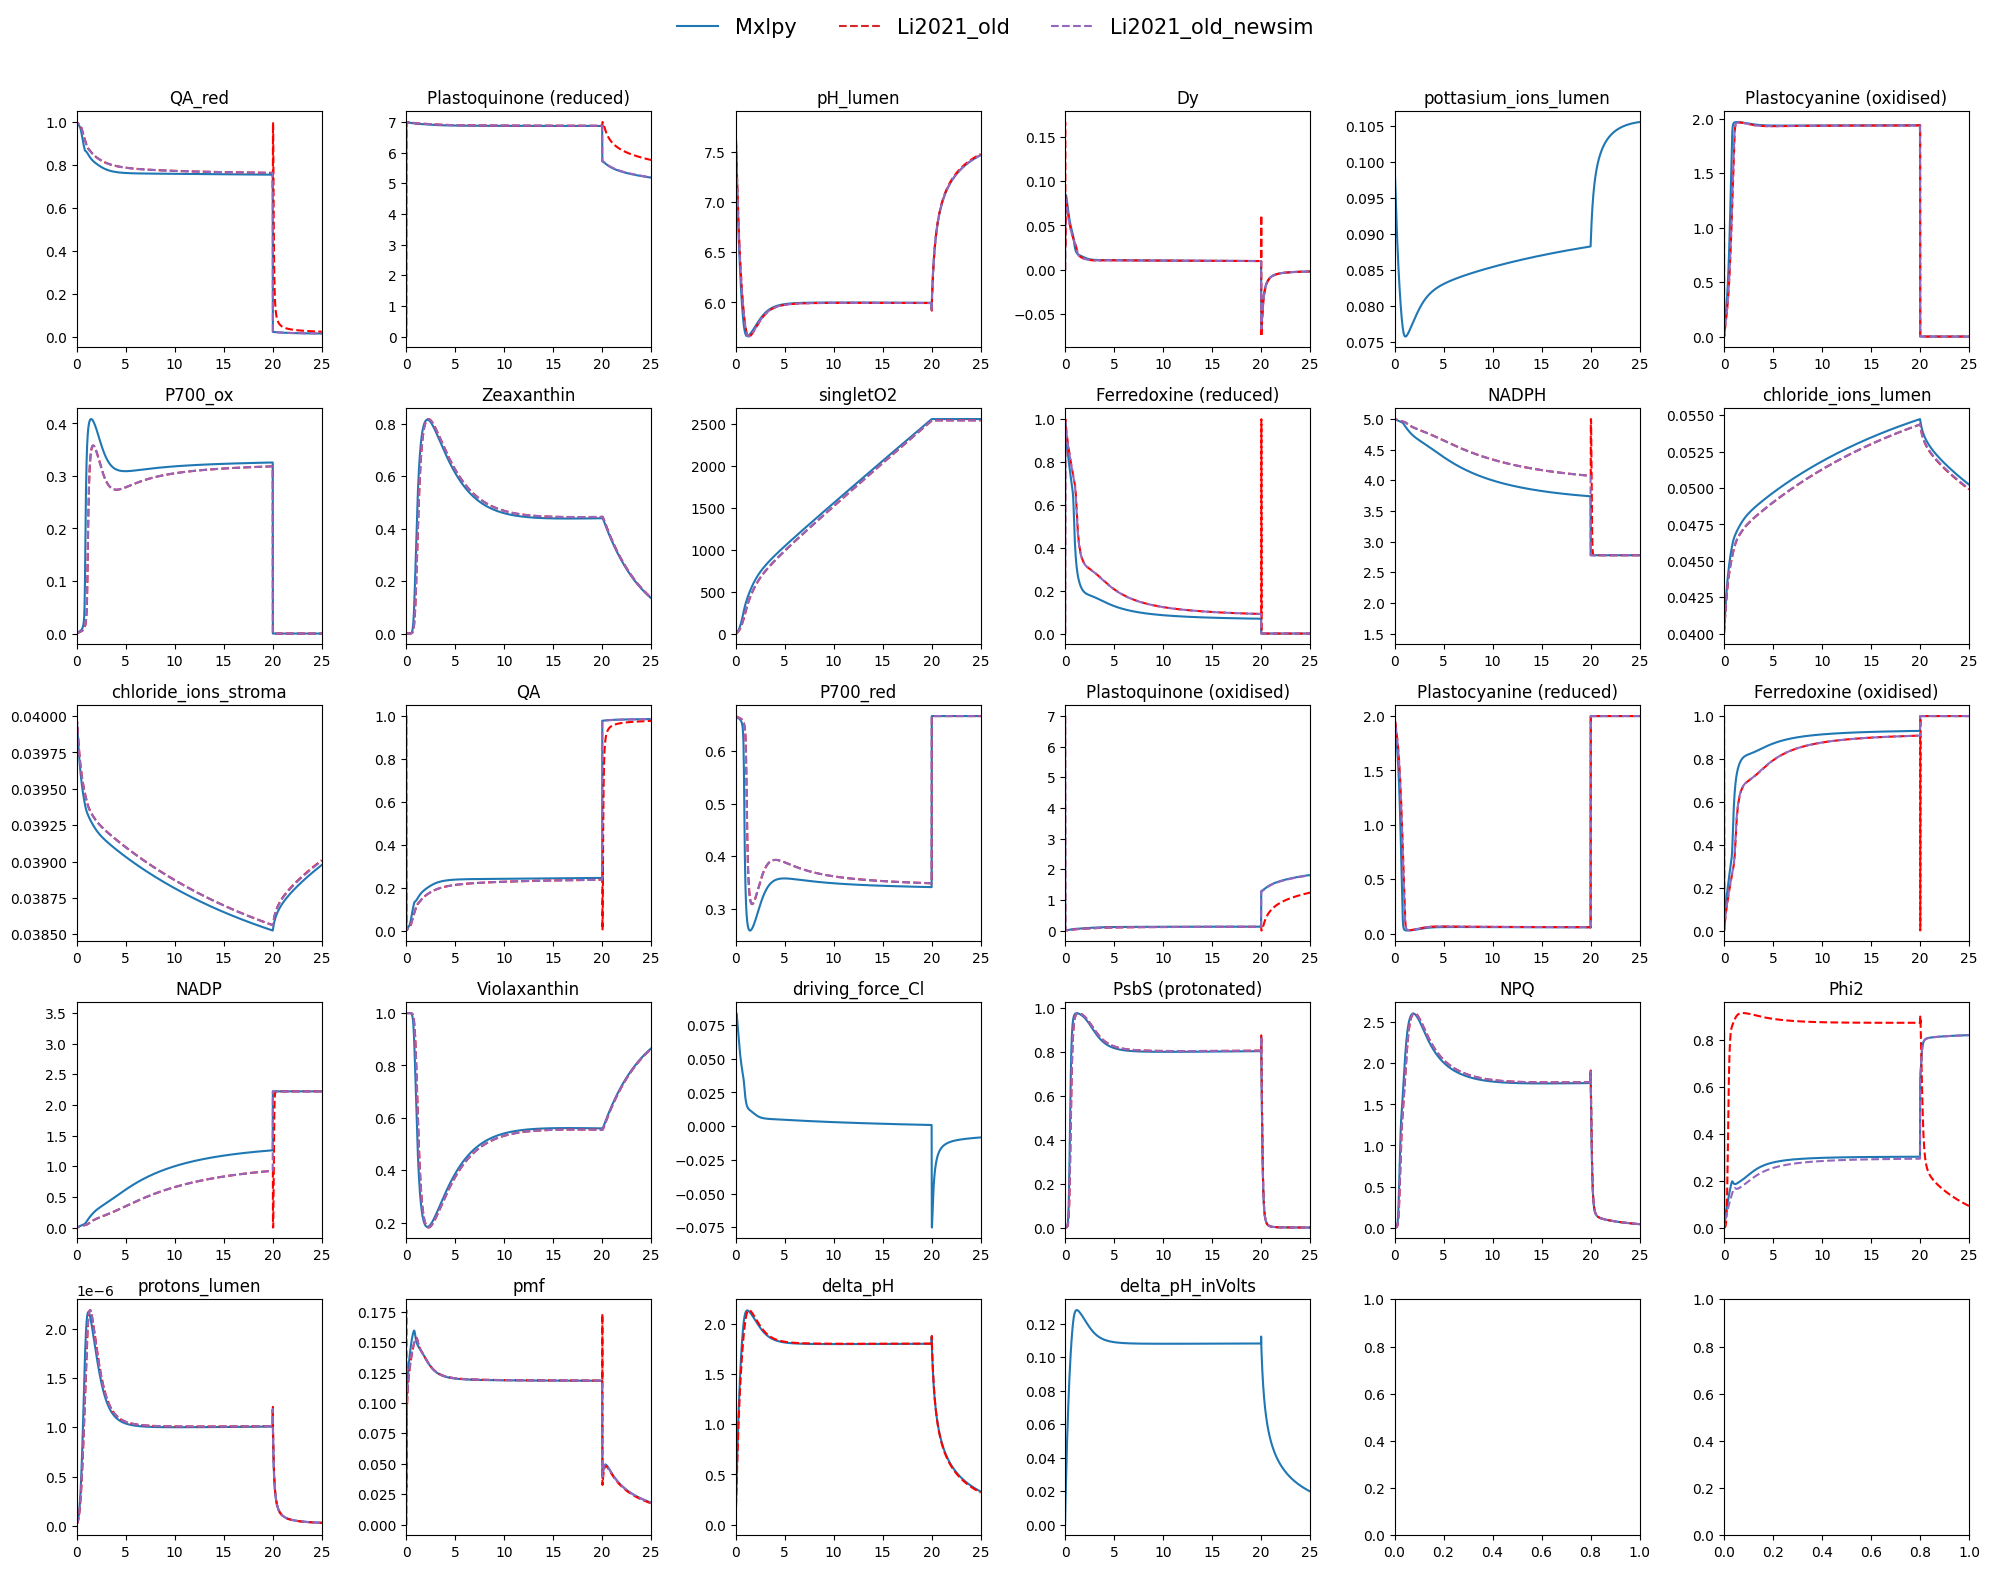

In [6]:
from deltapsi_leaf_old import sim_a_gtype
from deltapsi_leaf_oldmodel_new_sim import sim_a_gtype as new_sim

res_old = sim_a_gtype({}, "WT", 500)
res_new = new_sim({}, "WT", 500)

m = get_li2021()

light_100 = make_protocol([(20 * 60, {"PAR": 500}), (5 * 60, {"PAR": 0})])

s = Simulator(m)
s.simulate_protocol(light_100, time_points_per_step=1000)
res, flux = s.get_result()

fig, axs = plt.subplots(ncols=math.ceil(np.sqrt(len(res.columns))), nrows=math.floor(np.sqrt(len(res.columns))), figsize=(20, 15))

old = ["QAm", "PQH2", "K_lumen", "PC_ox", "Zx", "Fd_red", "Cl_lumen", "Cl_stroma", "PQ", "PC_red", "Fd_ox", "H_lumen", "H_stroma", "Vx", "PsbS_H"]
new = ["QA_red", n.pq_red(), n.pottassium("_lumen"), n.pc_ox(), n.zx(), n.fd_red(), n.chloride("_lumen"), n.chloride("_stroma"), n.pq_ox(), n.pc_red(), n.fd_ox(), n.h("_lumen"), n.h("_stroma"), n.vx(), n.psbs_pr()]

for o, ne in zip(old, new):
    if o in res_old.keys():
        res_old[ne] = res_old.pop(o)
    if o in res_new.keys():
        res_new[ne] = res_new.pop(o)

for ax, var in zip(axs.flatten(), res.columns):
    ax.plot(res.index / 60, res[var])
    ax.set_title(var)
    ax.set_xlim(0, 25)
    
    if var in res_old.keys():
        ax.plot(res_old["time_axis_min"], res_old[var], ls="dashed", color="red")
    if var in res_new.keys():
        ax.plot(res_new["time_axis_min"], res_new[var], ls="dashed", color="tab:purple")
    

fig.legend(
    [
        Line2D([0], [0], color="tab:blue", ls="solid"),
        Line2D([0], [0], color="tab:red", ls="dashed"),
        Line2D([0], [0], color="tab:purple", ls="dashed")
    ],
    ["Mxlpy", "Li2021_old", "Li2021_old_newsim"],
    ncols=3,
    frameon=False,
    loc="upper center",
    prop={"size": 15},
    bbox_to_anchor=(0.5, 1.05)
)

fig.tight_layout()
plt.show()

# Compare both li with mxlpy

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'], ['k_CBC', 60, 40.0]]

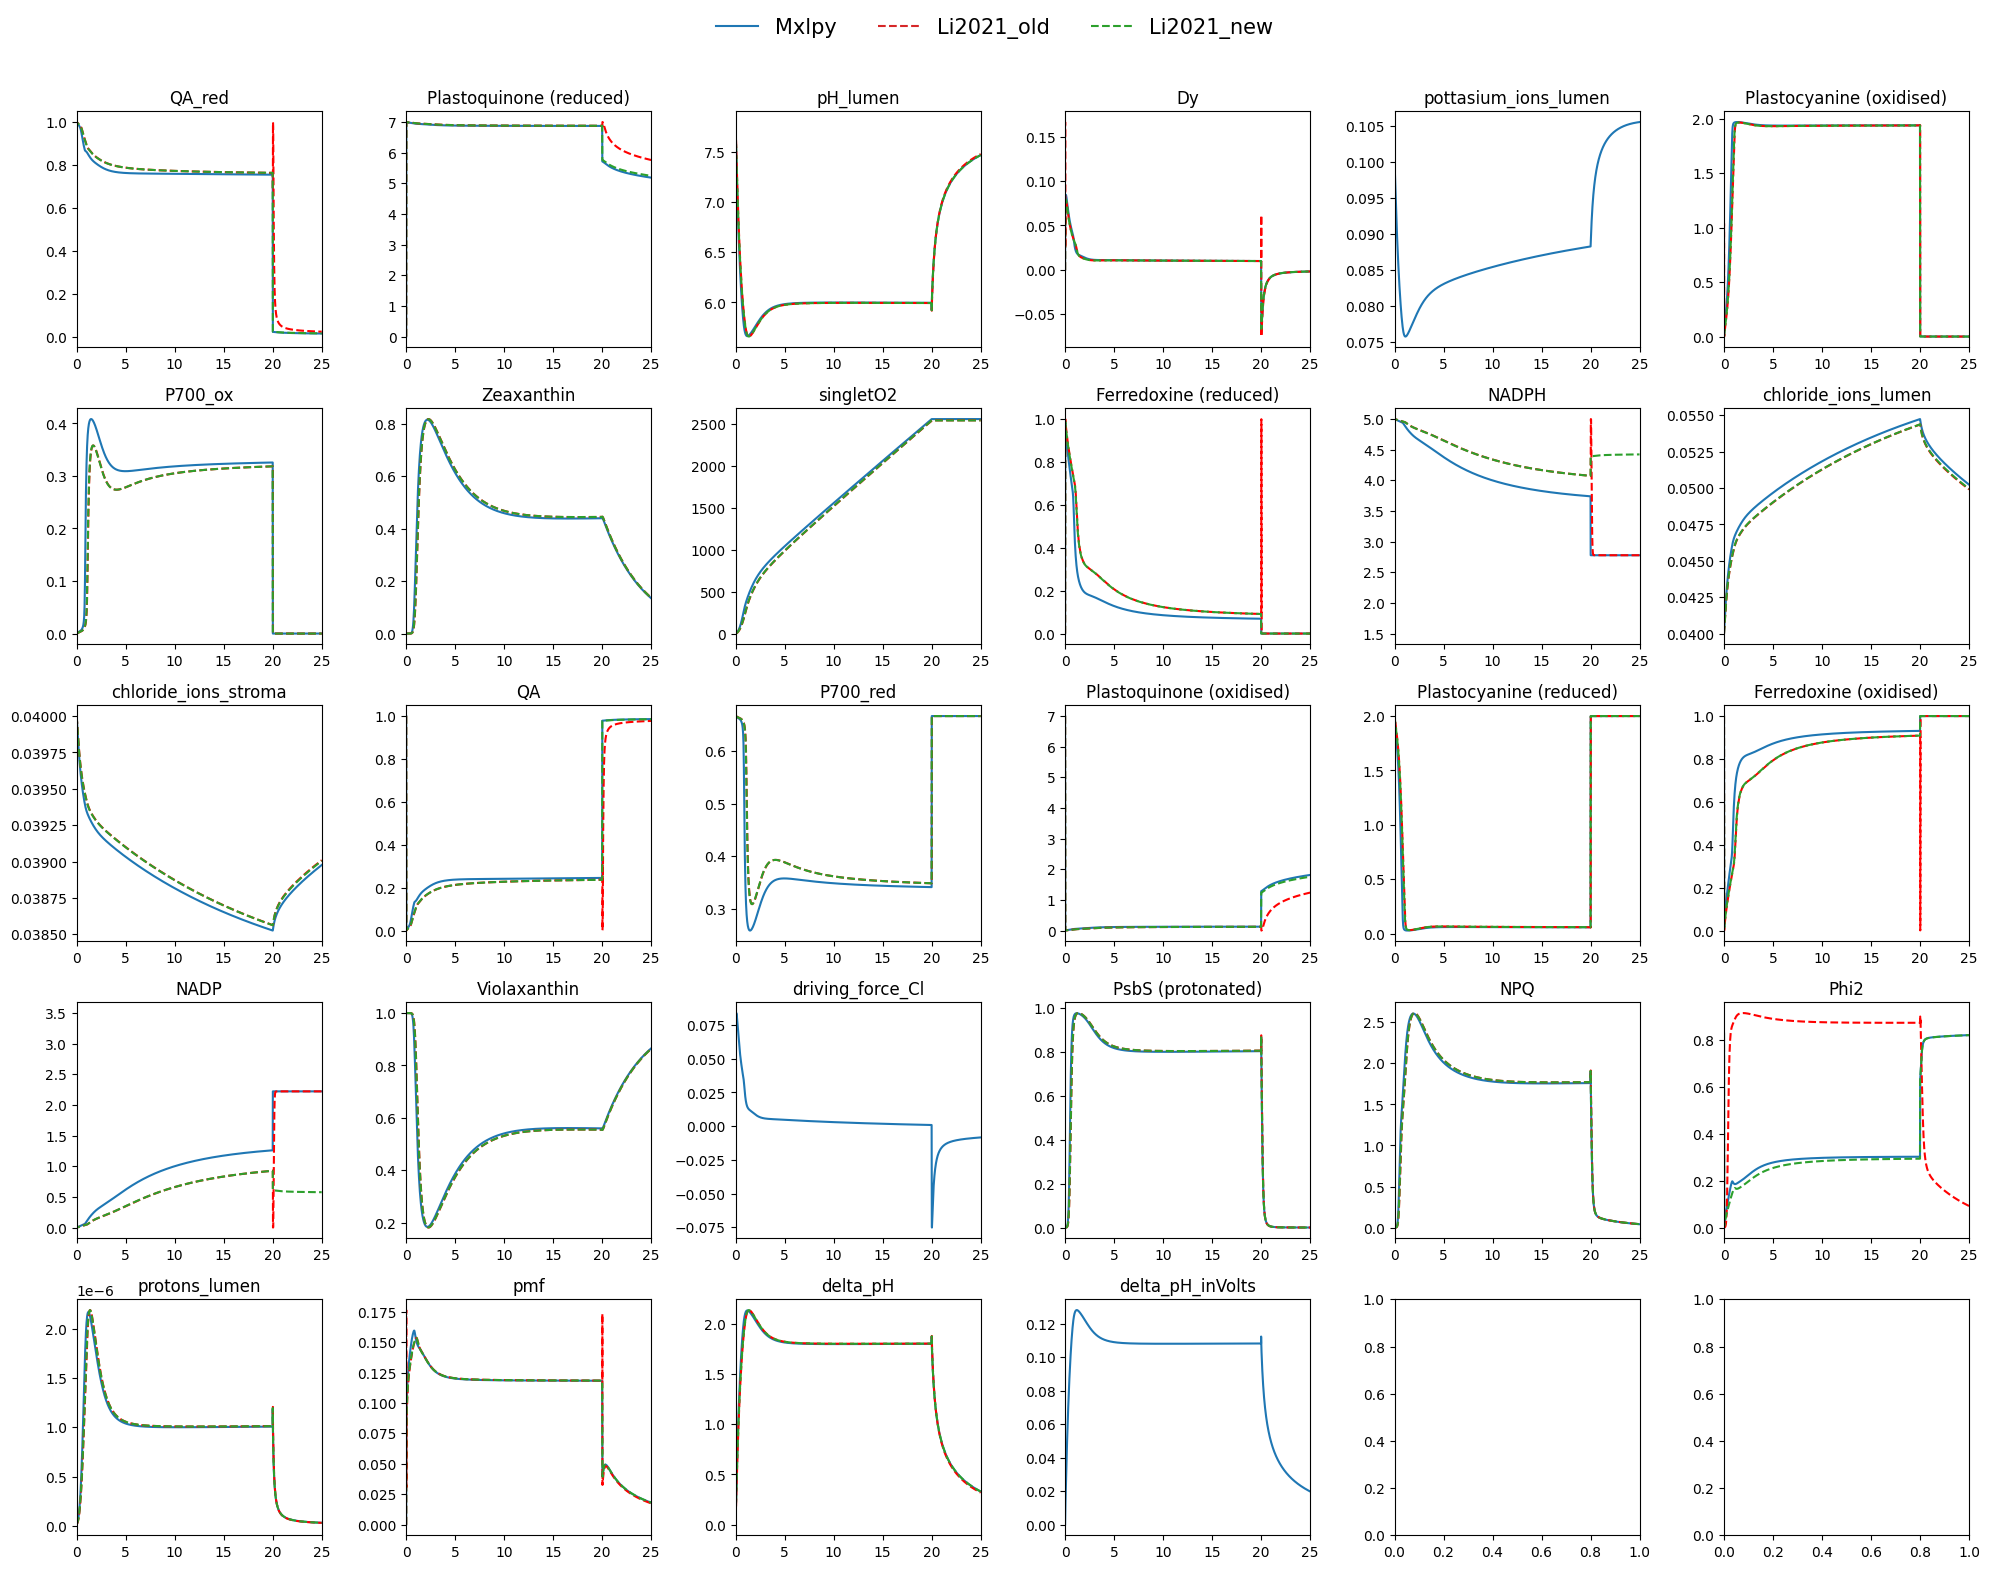

In [7]:
from deltapsi_leaf_old import sim_a_gtype

res_old = sim_a_gtype({}, "WT", 500)

m = get_li2021()

light_100 = make_protocol([(20 * 60, {"PAR": 500}), (5 * 60, {"PAR": 0})])

s = Simulator(m)
s.simulate_protocol(light_100, time_points_per_step=1000)
res, flux = s.get_result()

fig, axs = plt.subplots(ncols=math.ceil(np.sqrt(len(res.columns))), nrows=math.floor(np.sqrt(len(res.columns))), figsize=(20, 15))

old = ["QAm", "PQH2", "K_lumen", "PC_ox", "Zx", "Fd_red", "Cl_lumen", "Cl_stroma", "PQ", "PC_red", "Fd_ox", "H_lumen", "H_stroma", "Vx", "PsbS_H"]
new = ["QA_red", n.pq_red(), n.pottassium("_lumen"), n.pc_ox(), n.zx(), n.fd_red(), n.chloride("_lumen"), n.chloride("_stroma"), n.pq_ox(), n.pc_red(), n.fd_ox(), n.h("_lumen"), n.h("_stroma"), n.vx(), n.psbs_pr()]

for o, ne in zip(old, new):
    if o in res_old.keys():
        res_old[ne] = res_old.pop(o)
        
old = ["QAm", "PQH2", "K_lumen", "PC_ox", "Zx", "Fd_red", "Cl_lumen", "Cl_stroma", "PQ", "PC_red", "Fd_ox", "H_lumen", "H_stroma", "Vx", "PsbS_H"]
new = ["QA_red", n.pq_red(), n.pottassium("_lumen"), n.pc_ox(), n.zx(), n.fd_red(), n.chloride("_lumen"), n.chloride("_stroma"), n.pq_ox(), n.pc_red(), n.fd_ox(), n.h("_lumen"), n.h("_stroma"), n.vx(), n.psbs_pr()]

for o, ne in zip(old, new):
    if o in res_li.keys():
        res_li[ne] = res_li.pop(o)

for ax, var in zip(axs.flatten(), res.columns):
    ax.plot(res.index / 60, res[var])
    ax.set_title(var)
    ax.set_xlim(0, 25)
    
    if var in res_old.keys():
        ax.plot(res_old["time_axis_min"], res_old[var], ls="dashed", color="red")
        ax.plot(res_li["time_min"], res_li[var], ls="dashed", color="tab:green")
    

fig.legend(
    [
        Line2D([0], [0], color="tab:blue", ls="solid"),
        Line2D([0], [0], color="tab:red", ls="dashed"),
        Line2D([0], [0], color="tab:green", ls="dashed")
    ],
    ["Mxlpy", "Li2021_old", "Li2021_new"],
    ncols=3,
    frameon=False,
    loc="upper center",
    prop={"size": 15},
    bbox_to_anchor=(0.5, 1.05)
)

fig.tight_layout()
plt.show()

# Compare li_old_new_sim with new li with mxlpy

FloatProgress(value=0.0, max=101.0)

v_lef=np.float64(0.0), t=0.0
v_lef=np.float64(2.81286542369692), t=4.016370991214278e-06
v_lef=np.float64(2.688590044680149), t=4.016370991214278e-06
v_lef=np.float64(0.5690251471164578), t=8.124868238972767e-07
v_lef=np.float64(0.5639395059177513), t=8.124868238972767e-07
v_lef=np.float64(1.1279697308824235), t=1.6249736477945535e-06
v_lef=np.float64(1.1229286861310057), t=1.6249736477945535e-06
v_lef=np.float64(2.230958581377106), t=3.249947295589107e-06
v_lef=np.float64(2.2310475221643933), t=3.249947295589107e-06
v_lef=np.float64(3.319310471990534), t=4.87492094338366e-06
v_lef=np.float64(3.31948789862133), t=4.87492094338366e-06
v_lef=np.float64(4.388467499719051), t=6.499894591178214e-06
v_lef=np.float64(4.388641402133842), t=6.499894591178214e-06
v_lef=np.float64(11.804029028274446), t=1.8655294312339467e-05
v_lef=np.float64(11.80640746664317), t=1.8655294312339467e-05
v_lef=np.float64(18.3064822191311), t=3.081069403350072e-05
v_lef=np.float64(18.295247051486935), t=3.081069403

[['Changed Parameter', 'Old Value', 'New Value'], ['k_CBC', 60, 40.0]]

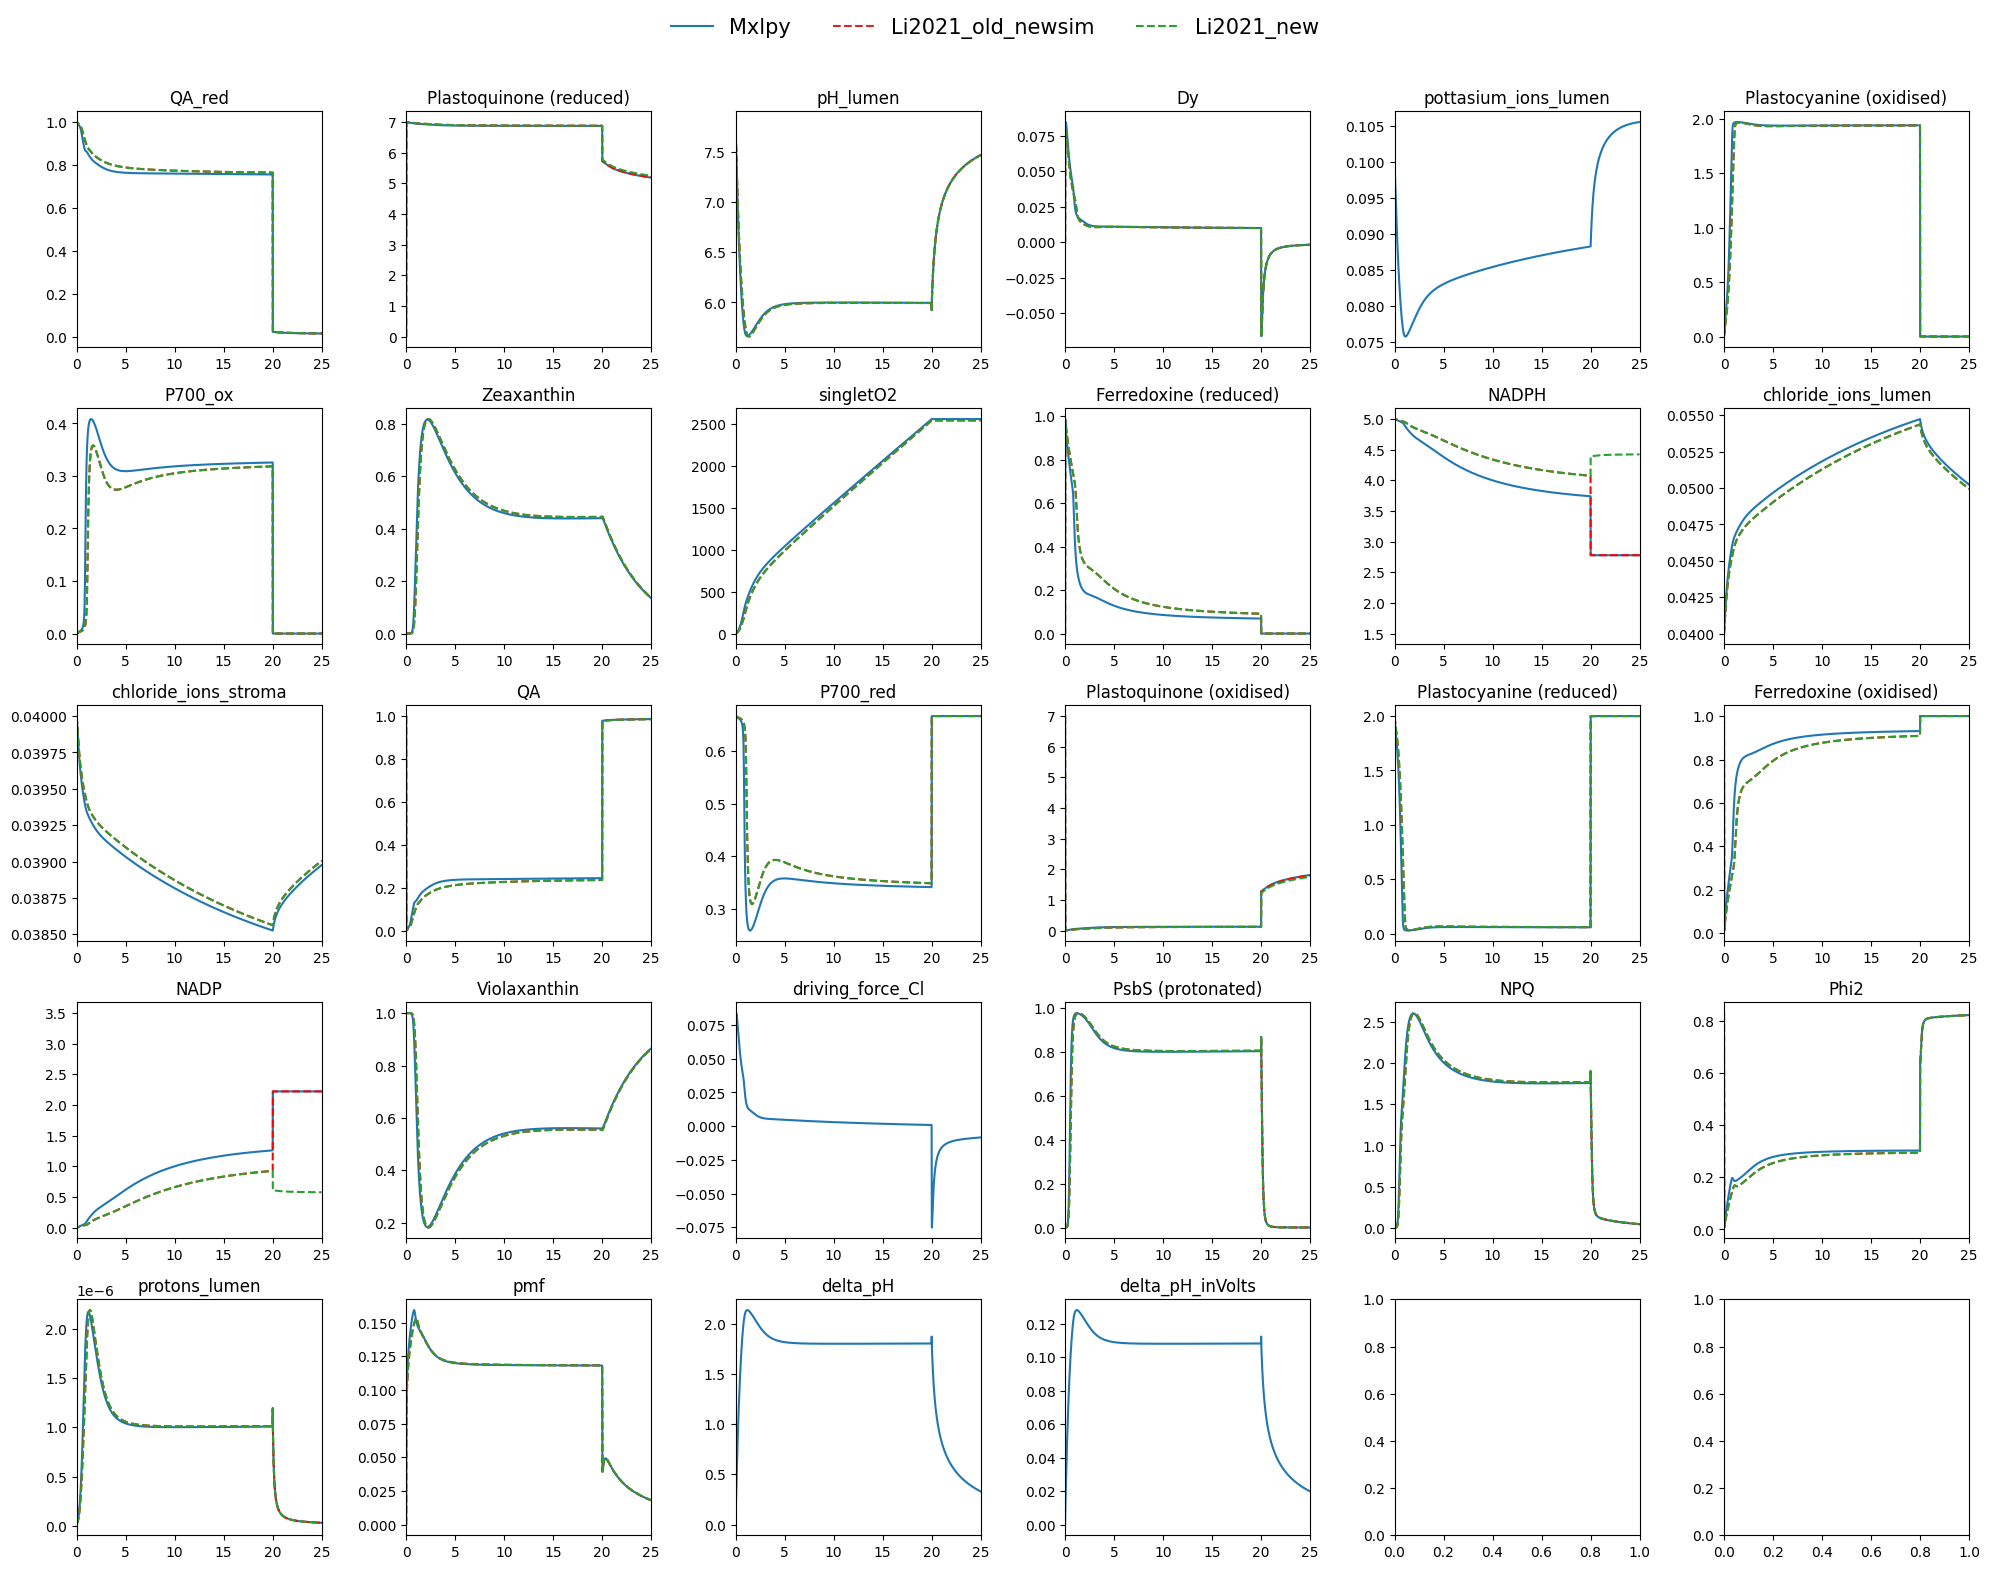

In [8]:
from deltapsi_leaf_oldmodel_new_sim import sim_a_gtype

res_old = sim_a_gtype({}, "WT", 500)

m = get_li2021()

light_100 = make_protocol([(20 * 60, {"PAR": 500}), (5 * 60, {"PAR": 0})])

s = Simulator(m)
s.simulate_protocol(light_100, time_points_per_step=1000)
res, flux = s.get_result()

fig, axs = plt.subplots(ncols=math.ceil(np.sqrt(len(res.columns))), nrows=math.floor(np.sqrt(len(res.columns))), figsize=(20, 15))

old = ["QAm", "PQH2", "K_lumen", "PC_ox", "Zx", "Fd_red", "Cl_lumen", "Cl_stroma", "PQ", "PC_red", "Fd_ox", "H_lumen", "H_stroma", "Vx", "PsbS_H"]
new = ["QA_red", n.pq_red(), n.pottassium("_lumen"), n.pc_ox(), n.zx(), n.fd_red(), n.chloride("_lumen"), n.chloride("_stroma"), n.pq_ox(), n.pc_red(), n.fd_ox(), n.h("_lumen"), n.h("_stroma"), n.vx(), n.psbs_pr()]

for o, ne in zip(old, new):
    if o in res_old.keys():
        res_old[ne] = res_old.pop(o)
        
old = ["QAm", "PQH2", "K_lumen", "PC_ox", "Zx", "Fd_red", "Cl_lumen", "Cl_stroma", "PQ", "PC_red", "Fd_ox", "H_lumen", "H_stroma", "Vx", "PsbS_H"]
new = ["QA_red", n.pq_red(), n.pottassium("_lumen"), n.pc_ox(), n.zx(), n.fd_red(), n.chloride("_lumen"), n.chloride("_stroma"), n.pq_ox(), n.pc_red(), n.fd_ox(), n.h("_lumen"), n.h("_stroma"), n.vx(), n.psbs_pr()]

for o, ne in zip(old, new):
    if o in res_li.keys():
        res_li[ne] = res_li.pop(o)

for ax, var in zip(axs.flatten(), res.columns):
    ax.plot(res.index / 60, res[var])
    ax.set_title(var)
    ax.set_xlim(0, 25)
    
    if var in res_old.keys():
        ax.plot(res_old["time_axis_min"], res_old[var], ls="dashed", color="red")
        ax.plot(res_li["time_min"], res_li[var], ls="dashed", color="tab:green")
    

fig.legend(
    [
        Line2D([0], [0], color="tab:blue", ls="solid"),
        Line2D([0], [0], color="tab:red", ls="dashed"),
        Line2D([0], [0], color="tab:green", ls="dashed")
    ],
    ["Mxlpy", "Li2021_old_newsim", "Li2021_new"],
    ncols=3,
    frameon=False,
    loc="upper center",
    prop={"size": 15},
    bbox_to_anchor=(0.5, 1.05)
)

fig.tight_layout()
plt.show()

# Compare differences between mxlpy and li_new

## Variables

In [9]:
from li2021_odeint_marvin import lightsim_20min_5min, get_params

m = get_li2021()

light_100 = make_protocol([(20 * 60, {"PAR": 500}), (5 * 60, {"PAR": 0})])

s = Simulator(m)
s.simulate_time_course(np.linspace(0, 1200, 1000))
# s.simulate_protocol(light_100, time_points_per_step=1000)

vari = s.get_result().get_variables()
# deri = s.get_result().get_variables().drop(s.get_result().get_variables(include_derived_variables=False).columns, axis=1)

t = vari.index[10]
odeint_vari = pd.Series(lightsim_20min_5min(500, get_params()).loc[t])

old = ["QAm", "PQH2", "K_lumen", "PC_ox", "Zx", "Fd_red", "Cl_lumen", "Cl_stroma", "PQ", "PC_red", "Fd_ox", "H_lumen", "H_stroma", "V", "PsbS_H"]
new = ["QA_red", n.pq_red(), n.pottassium("_lumen"), n.pc_ox(), n.zx(), n.fd_red(), n.chloride("_lumen"), n.chloride("_stroma"), n.pq_ox(), n.pc_red(), n.fd_ox(), n.h("_lumen"), n.h("_stroma"), n.vx(), n.psbs_pr()]

for o, ne in zip(old, new):
    if o in odeint_vari.keys():
        odeint_vari[ne] = odeint_vari.pop(o)

(odeint_vari - vari.loc[t]).sort_values(key=abs, ascending=False)

v_LEF=np.float64(0.0), t=0.0
v_LEF=np.float64(2.8128767960713237), t=4.016387229344361e-06
v_LEF=np.float64(2.6886004121596656), t=4.016387229344361e-06
v_LEF=np.float64(0.5690252002427424), t=8.124868997540404e-07
v_LEF=np.float64(0.5639395580944058), t=8.124868997540404e-07
v_LEF=np.float64(1.1279698352611407), t=1.624973799508081e-06
v_LEF=np.float64(1.1229287895725057), t=1.624973799508081e-06
v_LEF=np.float64(2.2309587855111017), t=3.249947599016162e-06
v_LEF=np.float64(2.2310477263230992), t=3.249947599016162e-06
v_LEF=np.float64(3.319310773203132), t=4.874921398524243e-06
v_LEF=np.float64(3.3194881998831853), t=4.874921398524243e-06
v_LEF=np.float64(4.388467894530152), t=6.499895198032324e-06
v_LEF=np.float64(4.388641796992879), t=6.499895198032324e-06
v_LEF=np.float64(11.804029373031792), t=1.865529491873321e-05
v_LEF=np.float64(11.806407811727613), t=1.865529491873321e-05
v_LEF=np.float64(18.306482521024893), t=3.08106946394341e-05
v_LEF=np.float64(18.295247353020372), t=3.081

singletO2                    2.720956e+00
Ferredoxine (reduced)        6.640501e-01
Ferredoxine (oxidised)      -6.640501e-01
Phi2                        -4.071302e-01
QA                          -1.607908e-01
QA_red                       1.607908e-01
NADPH                        3.240474e-02
NADP                        -3.240474e-02
Plastocyanine (oxidised)     2.438603e-02
Plastocyanine (reduced)     -2.438603e-02
delta_pH                    -1.701324e-02
pH_lumen                     1.701324e-02
Plastoquinone (reduced)      1.013982e-02
Plastoquinone (oxidised)    -1.013982e-02
driving_force_Cl             6.422185e-03
Dy                           6.360157e-03
pmf                          5.339363e-03
NPQ                         -5.614769e-04
PsbS (protonated)           -3.742930e-04
P700_red                    -3.329258e-04
P700_ox                      3.329258e-04
pottasium_ions_lumen         2.124331e-04
chloride_ions_lumen         -9.067653e-05
chloride_ions_stroma         9.067

## Derived

In [10]:
from li2021_odeint_marvin import get_derived, get_params

m = get_li2021()

par = 100

light_100 = make_protocol([(20 * 60, {"PAR": par}), (5 * 60, {"PAR": 0})])

s = Simulator(m)
s.simulate_protocol(light_100, time_points_per_step=1000)

vari = s.get_result().get_variables(include_derived_variables=False)
deri = s.get_result().get_variables().drop(s.get_result().get_variables(include_derived_variables=False).columns, axis=1)

t = vari.index[10]

params = get_params()
params["PAR"] = par

odeint_derived = pd.Series(get_derived(t, vari.loc[t], params))

old = ["QAm", "PQH2", "K_lumen", "PC_ox", "Zx", "Fd_red", "Cl_lumen", "Cl_stroma", "PQ", "PC_red", "Fd_ox", "H_lumen", "H_stroma", "V", "PsbS_H"]
new = ["QA_red", n.pq_red(), n.pottassium("_lumen"), n.pc_ox(), n.zx(), n.fd_red(), n.chloride("_lumen"), n.chloride("_stroma"), n.pq_ox(), n.pc_red(), n.fd_ox(), n.h("_lumen"), n.h("_stroma"), n.vx(), n.psbs_pr()]

for o, ne in zip(old, new):
    if o in odeint_derived.keys():
        odeint_derived[ne] = odeint_derived.pop(o)

odeint_derived - deri.loc[t]

Ferredoxine (oxidised)      0.0
NADP                        0.0
NPQ                         0.0
P700_red                    0.0
Phi2                        0.0
Plastocyanine (reduced)     0.0
Plastoquinone (oxidised)    0.0
PsbS (protonated)           0.0
QA                          0.0
Violaxanthin                0.0
delta_pH                    NaN
delta_pH_inVolts            NaN
driving_force_Cl            0.0
pmf                         0.0
protons_lumen               0.0
protons_stroma              NaN
dtype: float64

## Rates

In [11]:
from li2021_odeint_marvin import get_rates, get_params
from mxlpy_version import get_li2021

m = get_li2021()

par = 500

light_100 = make_protocol([(20 * 60, {"PAR": par}), (5 * 60, {"PAR": 0})])

s = Simulator(m)
s.simulate_protocol(light_100, time_points_per_step=1000)

fluxes = s.get_result().get_fluxes()

t = vari.index[1]

params = get_params()
params["PAR"] = par

odeint_fluxes = pd.Series(get_rates(t, vari.loc[t], params))

old = ["v_VDE"]
new = [n.violaxanthin_deepoxidase()]

for o, ne in zip(old, new):
    if o in odeint_fluxes.keys():
        odeint_fluxes[ne] = odeint_fluxes.pop(o)

(odeint_fluxes - fluxes.loc[t]).sort_values(key=abs, ascending=False)

v_LEF=1.7729266100258827, t=np.float64(1.2)


v_PSI_charge_separation      1.437529e+01
v_PSII_charge_separations    1.155611e+01
v_CBB_NADPH                 -3.038138e-01
v_PQH2_oxidation_QA          2.931879e-01
v_PQ_reduction_QA            2.242798e-01
v_pmf_protons_activity       1.595152e-01
v_NDH                        8.634038e-02
v_b6f                        1.789600e-02
v_PC_oxidation_P700          1.779449e-02
v_K_channel                 -1.739866e-02
v_LEF                       -1.600066e-02
v_VCCN1                     -6.808517e-03
v_leak                       2.979205e-03
v_PSII_recombination         2.313898e-03
v_Mehler                    -7.619259e-05
v_CLCE                       3.106497e-06
v_KEA                        1.435271e-08
violaxanthin_deepoxidase     1.679859e-10
v_ZE                         8.184992e-13
v_PGR                        0.000000e+00
dtype: float64

## Derived Parameters

In [12]:
from li2021_odeint_marvin import get_rates, get_params
from mxlpy_version import get_li2021

m = get_li2021()

par = 500

light_100 = make_protocol([(20 * 60, {"PAR": par}), (5 * 60, {"PAR": 0})])

s = Simulator(m)
s.simulate_protocol(light_100, time_points_per_step=1000)

vari = s.get_result().get_variables()
print(vari.columns)
m.get_right_hand_side()

t = vari.index[1]

params = get_params()
params["PAR"] = par

odeint_fluxes = pd.Series(get_rates(t, vari.loc[t], params))

old = ["v_VDE"]
new = [n.violaxanthin_deepoxidase()]

for o, ne in zip(old, new):
    if o in odeint_fluxes.keys():
        odeint_fluxes[ne] = odeint_fluxes.pop(o)

(odeint_fluxes - fluxes.loc[t]).sort_values(key=abs, ascending=False)

Index(['QA_red', 'Plastoquinone (reduced)', 'pH_lumen', 'Dy',
       'pottasium_ions_lumen', 'Plastocyanine (oxidised)', 'P700_ox',
       'Zeaxanthin', 'singletO2', 'Ferredoxine (reduced)', 'NADPH',
       'chloride_ions_lumen', 'chloride_ions_stroma', 'QA', 'P700_red',
       'Plastoquinone (oxidised)', 'Plastocyanine (reduced)',
       'Ferredoxine (oxidised)', 'NADP', 'Violaxanthin', 'driving_force_Cl',
       'PsbS (protonated)', 'NPQ', 'Phi2', 'protons_lumen', 'pmf', 'delta_pH',
       'delta_pH_inVolts'],
      dtype='object')


ValueError: too many values to unpack (expected 13)